In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

import scipy
import statsmodels
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

from random import randrange
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("DAILY_FOREX.csv")
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,01-01-2020,71.227,71.365,71.377,71.225,1.16K,-0.18%
1,02-01-2020,71.350,71.235,71.408,71.235,4.63K,0.17%
2,03-01-2020,71.770,71.610,71.844,71.520,7.49K,0.59%
3,06-01-2020,71.867,72.011,72.123,71.834,7.44K,0.14%
4,07-01-2020,71.845,71.765,71.923,71.670,6.69K,-0.03%


In [4]:
df1=data[["Date","Price"]]
df1.columns = ['date', 'rate']
df1.head()

,date,rate
0,01-01-2020,71.227
1,02-01-2020,71.350
2,03-01-2020,71.770
3,06-01-2020,71.867
4,07-01-2020,71.845


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    733 non-null    object 
 1   rate    733 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.6+ KB


In [6]:
# Converting the datatype from Object to datetime and numeric.
from datetime import datetime, date 
df1['date'] = pd.to_datetime(df1.date, format = '%d-%m-%Y')
df1['rate'] = pd.to_numeric(df1.rate)
df1.head()

,date,rate
0,2020-01-01,71.227
1,2020-01-02,71.350
2,2020-01-03,71.770
3,2020-01-06,71.867
4,2020-01-07,71.845


In [7]:
df2=df1.copy()

<AxesSubplot:xlabel='date'>

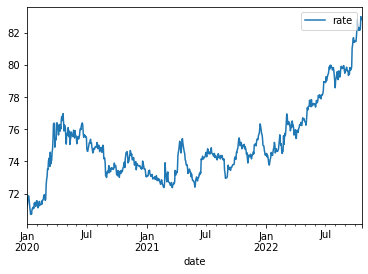

In [48]:
df2.plot()

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    733 non-null    datetime64[ns]
 1   rate    733 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.6 KB


In [9]:
len(df2)

733

In [10]:
df2.describe()

,rate
count,733.000000
mean,75.091385
std,2.357741
min,70.710000
25%,73.530000
50%,74.580000
75%,75.979000
max,83.013000


# ARIMA

In [11]:
df2.set_index('date', inplace=True)

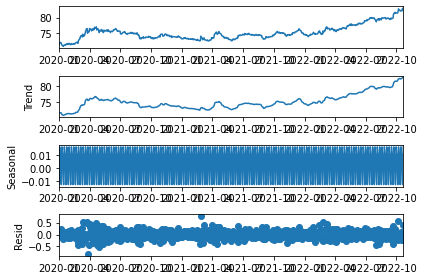

In [12]:
# Components of the Time series

decomposed = seasonal_decompose(df2)
decomposed.plot();
plt.show()

In [13]:
#REGRESSION
len(df2)

733

In [14]:
df3=df2.copy()

In [15]:
# Splitting the dataset into train as first 580 days data, and test as last 5 months data.
train = df3[:117]
test = df3[117:]

In [16]:
X_train = train.drop('rate',axis=1)
X_test = test.drop('rate',axis=1)
y_train = train[['rate']]
y_test = test[['rate']]

In [17]:
df3.head()

,rate
date,
2020-01-01,71.227
2020-01-02,71.350
2020-01-03,71.770
2020-01-06,71.867
2020-01-07,71.845


In [18]:
df3.reset_index(inplace=True)

In [19]:
# Converting the datatype from Object to datetime and numeric.

df3['date'] = pd.to_datetime(df3.date, format = '%d-%m-%Y')
df3['rate'] = pd.to_numeric(df3.rate)
df3.head()

,date,rate
0,2020-01-01,71.227
1,2020-01-02,71.350
2,2020-01-03,71.770
3,2020-01-06,71.867
4,2020-01-07,71.845


In [20]:
data2 = df3.copy()

<AxesSubplot:xlabel='date'>

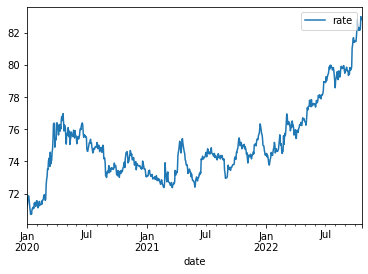

In [21]:
df3.plot('date')

In [22]:
df3.set_index('date', inplace=True)

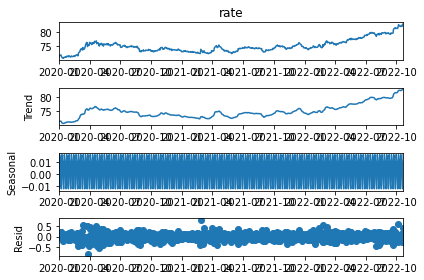

In [23]:
# Decomposing the dataset to see all kind of components of our time series.
decomp = seasonal_decompose(df3['rate'],  model='additive')
decomp.plot();

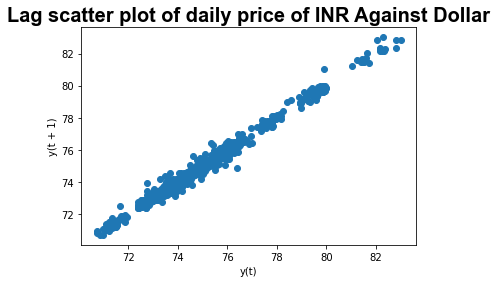

In [24]:
lag_plot(series = df3.rate)
plt.title('Lag scatter plot of daily price of INR Against Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

In [25]:
values = pd.DataFrame(df3.rate.values)
lags = 7
columns = [values]

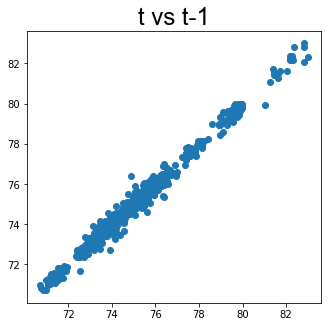

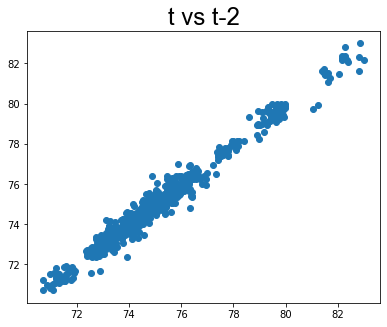

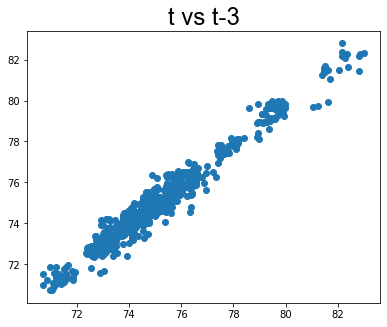

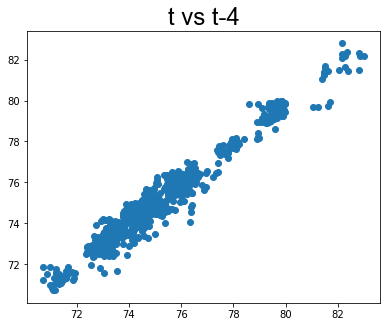

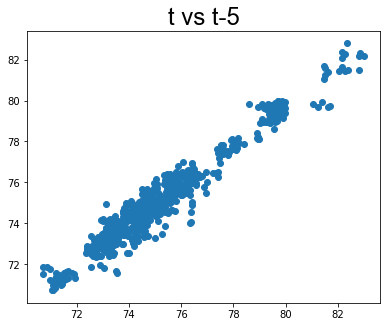

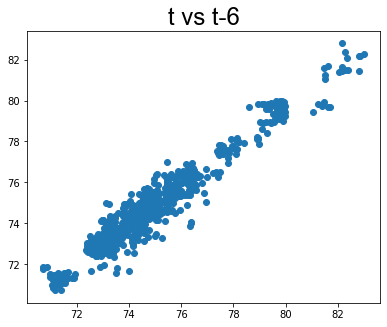

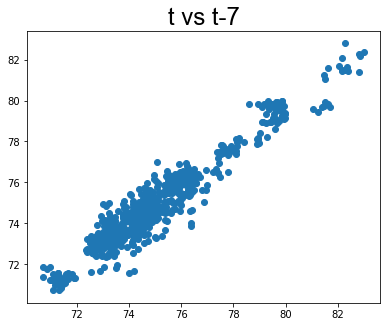

In [26]:
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)

columns = ['t']

for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))

dataframe.columns = columns

plt.figure(1, figsize=(5,4))

for i in range(1, (lags+1)):
  ax = plt.subplot(240 + i)
  plt.subplots_adjust(left = 0.1, bottom=0.1, right=1.9, top =2, wspace = -0.6, hspace = 0.01)
  ax.set_title('t vs t-' + str(i), family = 'Arial', fontsize = 24)
  plt.scatter(x = dataframe['t'].values, y = dataframe['t-'+str(i)].values)
  plt.show()

In [51]:
# Stationarity test
series = df3.loc[:, 'rate'].values
result = adfuller(series, autolag='AIC')
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Test Statistic                  -0.053769
p-value                          0.953853
Lags Used                        0.000000
Number of Observations Used    731.000000
Critical Value (1%)             -3.439327
Critical Value (5%)             -2.865502
Critical Value (10%)            -2.568880
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary


,rate,diff
date,,
2022-10-17,82.171,-0.169
2022-10-18,82.291,0.120
2022-10-19,83.013,0.722
2022-10-20,82.825,-0.188
2022-10-21,82.842,0.017


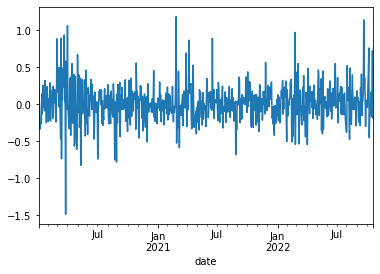

In [52]:
# Differencing the series first order differencing to make it stationary
df3['diff']= df3['rate'].diff(periods=1)
df3 = df3.dropna() # Removing null rates

df3['diff'].plot()
df3.tail()


In [53]:
# Checkign the stationary of the difference series
series = df3.loc[:, 'diff'].values
result = adfuller(series, autolag='AIC')
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Test Statistic                 -28.245065
p-value                          0.000000
Lags Used                        0.000000
Number of Observations Used    730.000000
Critical Value (1%)             -3.439340
Critical Value (5%)             -2.865507
Critical Value (10%)            -2.568883
dtype: float64
Reject Ho - Time Series is Stationary


In [30]:
#time series is now stationary

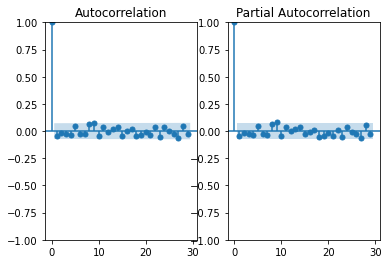

In [54]:
fig, ax = plt.subplots(1,2)
plot_acf(df3['diff'], ax=ax[0])
plot_pacf(df3['diff'], ax=ax[1]); plt.show()

In [57]:
diff=df3['diff']

<Figure size 864x432 with 0 Axes>

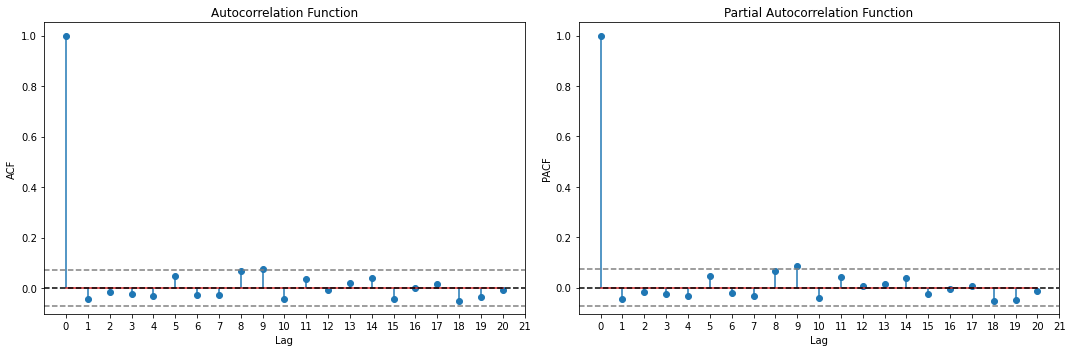

In [58]:
plt.figure(figsize=(12,6))

lag_acf = acf(diff, nlags = 20)
lag_pacf = pacf(diff, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [32]:
# take the original series and not the differenced one for forecasting
# Deleting the diff column

df3.drop(['diff'], axis=1, inplace=True)

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from pmdarima.arima import auto_arima

In [34]:
# building the ARIMA Model 
model = ARIMA(df3['rate'], order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   rate   No. Observations:                  732
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -41.420
Date:                Sat, 22 Oct 2022   AIC                             84.840
Time:                        10:51:28   BIC                             89.435
Sample:                    01-02-2020   HQIC                            86.613
                         - 10-21-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0656      0.002     32.571      0.000       0.062       0.070
===================================================================================
Ljung-Box (L1) (Q):                   1.42   Jarque-Bera (JB):               440.96
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.23
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:

(acorr_ljungbox(results.resid, lags=25, return_df=True) < 0.05)['lb_pvalue'].sum()

0

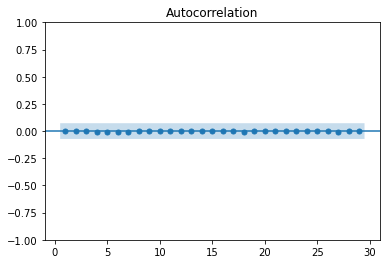

In [36]:
plot_acf(results.resid, zero=False);plt.show()



In [37]:
# Creating test and training data
def split_data(df, test_split=0.2):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test

train, test = split_data(df3, 0.2)
print(train.tail())
print(test.tail())


              rate
date              
2022-03-25  76.280
2022-03-28  76.080
2022-03-29  75.640
2022-03-30  75.801
2022-03-31  75.901
              rate
date              
2022-10-17  82.171
2022-10-18  82.291
2022-10-19  83.013
2022-10-20  82.825
2022-10-21  82.842


In [38]:
start = len(train)
end = len(train) + len(test) - 1
print(start, end)



586 731


<AxesSubplot:>

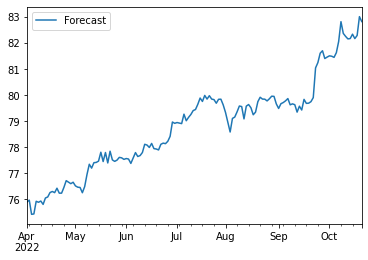

In [39]:
predictions = results.predict(start, end,
                             typ = 'levels').rename("Forecast")
predictions.plot(legend = True)

[]

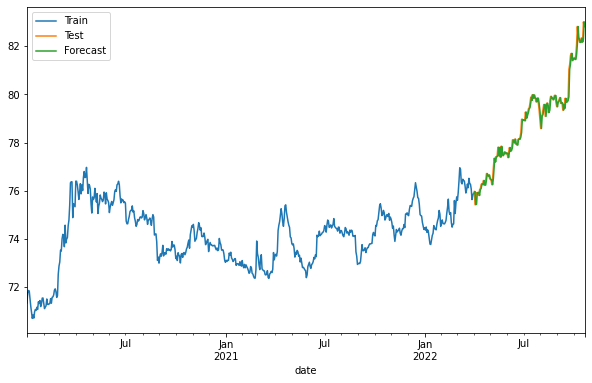

In [40]:
#forecast = pd.DataFrame(model.forecast(test.shape[0]), index=test.index)
train['rate'].plot(legend=True, label='Train', figsize=(10,6))
test['rate'].plot(legend=True, label='Test')
predictions.plot(legend = True)
plt.plot()

In [41]:
st=len(df3)
en=len(df3)+30
print(st,en)

732 762


<AxesSubplot:xlabel='date'>

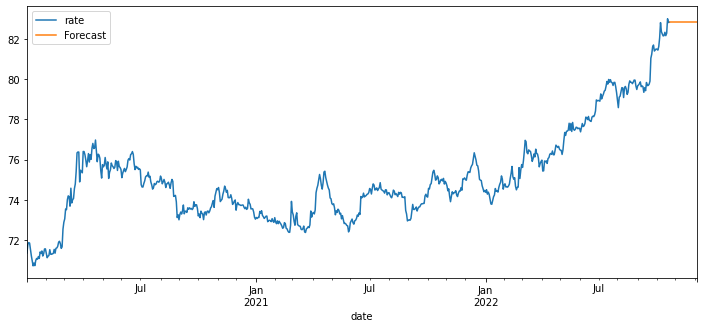

In [42]:

model = ARIMA(df3['rate'], order=(0,1,0))
result = model.fit()
  

forecast = result.predict(st,en,  
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df3['rate'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [43]:
values=result.get_forecast(steps=10)
values.summary_frame()

rate,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-10-24,82.842,0.256076,82.340101,83.343899
2022-10-25,82.842,0.362146,82.132208,83.551792
2022-10-26,82.842,0.443536,81.972685,83.711315
2022-10-27,82.842,0.512151,81.838202,83.845798
2022-10-28,82.842,0.572603,81.719720,83.964280
2022-10-31,82.842,0.627255,81.612603,84.071397
2022-11-01,82.842,0.677513,81.514100,84.169900
2022-11-02,82.842,0.724291,81.422415,84.261585
2022-11-03,82.842,0.768227,81.336303,84.347697
2022-11-04,82.842,0.809782,81.254856,84.429144


In [44]:
values.summary_frame()

rate,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-10-24,82.842,0.256076,82.340101,83.343899
2022-10-25,82.842,0.362146,82.132208,83.551792
2022-10-26,82.842,0.443536,81.972685,83.711315
2022-10-27,82.842,0.512151,81.838202,83.845798
2022-10-28,82.842,0.572603,81.719720,83.964280
2022-10-31,82.842,0.627255,81.612603,84.071397
2022-11-01,82.842,0.677513,81.514100,84.169900
2022-11-02,82.842,0.724291,81.422415,84.261585
2022-11-03,82.842,0.768227,81.336303,84.347697
2022-11-04,82.842,0.809782,81.254856,84.429144


In [45]:
data3=values.summary_frame()

In [46]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-10-24 to 2022-11-04
Freq: B
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean           10 non-null     float64
 1   mean_se        10 non-null     float64
 2   mean_ci_lower  10 non-null     float64
 3   mean_ci_upper  10 non-null     float64
dtypes: float64(4)
memory usage: 400.0 bytes


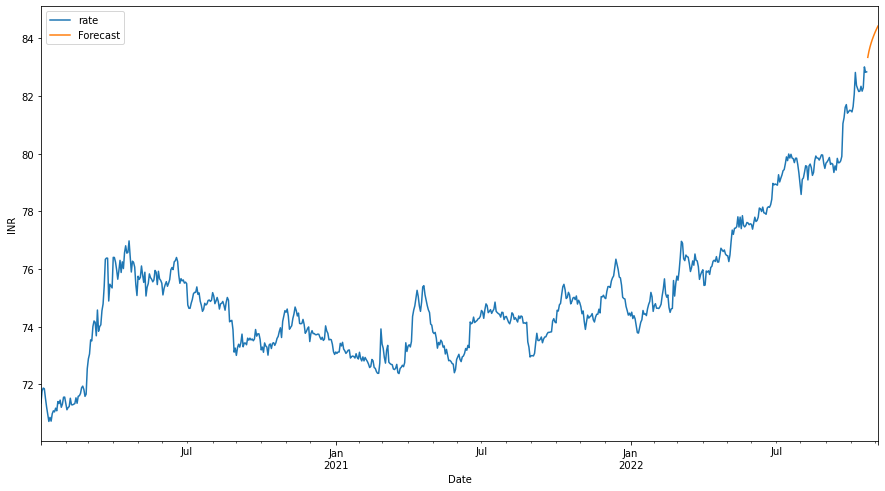

In [47]:
ax = df3.plot(label='observed', figsize=(15, 8))
data3.mean_ci_upper.plot(ax=ax, label='Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('INR')

plt.legend()
plt.show()

In [794]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,predictions))

0.24645565607418848

In [795]:
#Regression
df3.head()

,rate
date,
2020-01-02,71.350
2020-01-03,71.770
2020-01-06,71.867
2020-01-07,71.845
2020-01-08,71.510


In [796]:
len(df3)

732

In [797]:
time = [i+1 for i in range(len(df3))]
df3['time'] = time
df3.head()

,rate,time
date,,
2020-01-02,71.350,1
2020-01-03,71.770,2
2020-01-06,71.867,3
2020-01-07,71.845,4
2020-01-08,71.510,5


In [60]:
# Splitting the dataset 
train = df3[:580]
test = df3[580:]

In [61]:
X_train = train.drop('rate',axis=1)
X_test = test.drop('rate',axis=1)
y_train = train[['rate']]
y_test = test[['rate']]

In [62]:
from sklearn.linear_model import LinearRegression
#Define model
model = LinearRegression()

#fit model
model.fit(X = X_train, y = y_train)

#predict model
predictions = model.predict(X_test)

In [63]:
y_test['RegOnTime'] = predictions

In [64]:
predictions


array([[74.13037453],
       [74.04759876],
       [73.93723106],
       [74.21361017],
       [74.18555838],
       [74.17268215],
       [73.88940506],
       [74.14600995],
       [74.36306643],
       [74.12209695],
       [74.16118551],
       [74.08070907],
       [74.25223886],
       [74.15796645],
       [74.21774896],
       [74.15796645],
       [74.11933776],
       [74.21728909],
       [74.05265728],
       [74.13957184],
       [74.24028236],
       [74.25913684],
       [74.11197991],
       [74.11427924],
       [74.16486444],
       [74.07519068],
       [74.11657857],
       [74.13497318],
       [74.04621916],
       [74.24764021],
       [74.35294939],
       [74.32075881],
       [74.07151176],
       [74.23522384],
       [74.14417049],
       [74.16256511],
       [74.29638594],
       [73.97539989],
       [74.29868527],
       [73.95562568],
       [74.34651127],
       [73.98643666],
       [74.11335951],
       [74.16164538],
       [74.18831757],
       [74

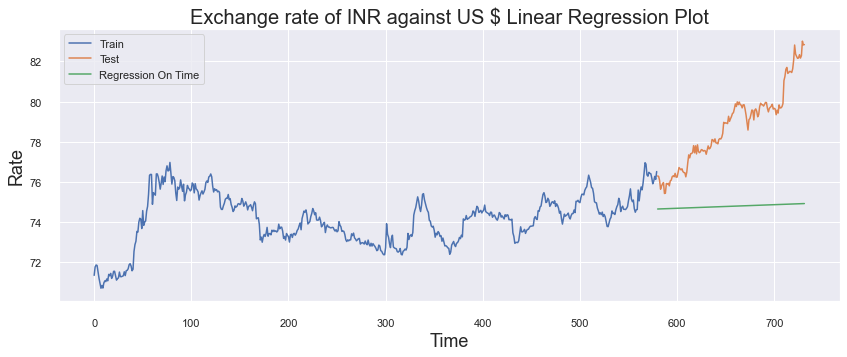

In [802]:
plt.figure(figsize=(14,5))
plt.plot(y_train['rate'].values, label = 'Train')   
plt.plot([None for i in y_train.values] + [x for x in y_test['rate'].values], label = 'Test')
plt.plot([None for i in y_train.values] + [x for x in y_test['RegOnTime'].values], label = 'Regression On Time')
plt.title('Exchange rate of INR against US $ Linear Regression Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

In [65]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [66]:
mean_absolute_percentage_error(y_test,predictions)

2.907881352791809

In [805]:
#fbProphet


In [806]:
from prophet import Prophet

In [807]:
data2.reset_index(inplace=True)

In [808]:
data2 = data2.rename(columns={'date' : 'ds','rate' : 'y'})
data2.head()

,index,ds,y
0,0,2020-01-01,71.227
1,1,2020-01-02,71.350
2,2,2020-01-03,71.770
3,3,2020-01-06,71.867
4,4,2020-01-07,71.845


In [809]:
training_data = data2[:580]
testing_data = data2[580:]

In [810]:
my_model = Prophet(interval_width=1)

In [811]:
my_model.fit(training_data)

17:32:27 - cmdstanpy - INFO - Chain [1] start processing
17:32:27 - cmdstanpy - INFO - Chain [1] done processing


In [812]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   733 non-null    int64         
 1   ds      733 non-null    datetime64[ns]
 2   y       733 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 17.3 KB


In [813]:
future_dates = my_model.make_future_dataframe(periods=153, freq='d')
future_dates.tail()

,ds
728,2022-08-18
729,2022-08-19
730,2022-08-20
731,2022-08-21
732,2022-08-22


In [1162]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
728,2022-08-18,75.725468,62.389978,89.295164
729,2022-08-19,75.669301,62.446230,89.302984
730,2022-08-20,74.773439,61.611581,88.017445
731,2022-08-21,74.699397,61.664577,88.765662
732,2022-08-22,75.445220,62.026159,89.367970


In [1163]:
from prophet.plot import plot_plotly,plot_components_plotly

In [1164]:
plot_plotly(my_model,forecast)

In [817]:
plot_components_plotly(my_model,forecast)

In [818]:
from statsmodels.tools.eval_measures import rmse

In [819]:
predictions = forecast.iloc[-153:]['yhat']

In [820]:
testing_data['y'].mean()

78.7516339869281

In [821]:
rmse(predictions,testing_data['y'])

3.242396597759753

In [822]:
mean_absolute_percentage_error(testing_data.y, forecast[580:].yhat)

3.328691488739386

In [823]:
dat3=data2[["ds","y"]]
dat3.head()

,ds,y
0,2020-01-01,71.227
1,2020-01-02,71.350
2,2020-01-03,71.770
3,2020-01-06,71.867
4,2020-01-07,71.845


In [824]:
propmodel=Prophet(interval_width=1)

In [825]:
resultsp=propmodel.fit(dat3)

17:32:29 - cmdstanpy - INFO - Chain [1] start processing
17:32:29 - cmdstanpy - INFO - Chain [1] done processing


In [826]:
st=len(dat3)
en=len(dat3)+30
print(st,en)

733 763


In [827]:
valuesp=result.get_forecast(steps=30)
valuesp.summary_frame()

rate,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-10-24,82.842,0.256076,82.340101,83.343899
2022-10-25,82.842,0.362146,82.132208,83.551792
2022-10-26,82.842,0.443536,81.972685,83.711315
2022-10-27,82.842,0.512151,81.838202,83.845798
2022-10-28,82.842,0.572603,81.719720,83.964280
2022-10-31,82.842,0.627255,81.612603,84.071397
2022-11-01,82.842,0.677513,81.514100,84.169900
2022-11-02,82.842,0.724291,81.422415,84.261585
2022-11-03,82.842,0.768227,81.336303,84.347697
2022-11-04,82.842,0.809782,81.254856,84.429144


In [828]:
data4=valuesp.summary_frame()

In [834]:
data4.head()

rate,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-10-24,82.842,0.256076,82.340101,83.343899
2022-10-25,82.842,0.362146,82.132208,83.551792
2022-10-26,82.842,0.443536,81.972685,83.711315
2022-10-27,82.842,0.512151,81.838202,83.845798
2022-10-28,82.842,0.572603,81.719720,83.964280


In [835]:
dat3.head()

,ds,y
0,2020-01-01,71.227
1,2020-01-02,71.350
2,2020-01-03,71.770
3,2020-01-06,71.867
4,2020-01-07,71.845


In [847]:
dat3.set_index('ds', inplace=True)

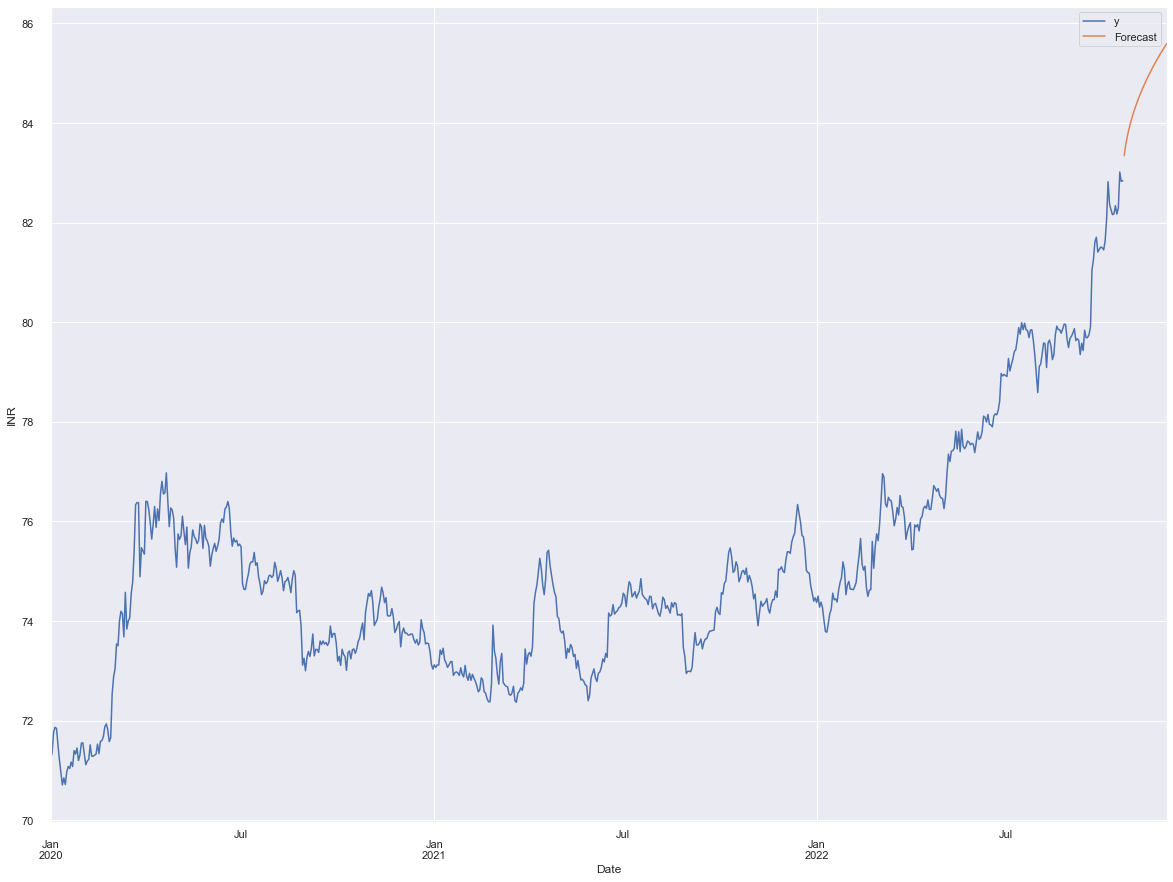

In [849]:
ax = dat3.plot(label='observed', figsize=(20, 15))
data4.mean_ci_upper.plot(ax=ax, label='Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('INR')

plt.legend()
plt.show()

In [853]:
#RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(testing_data['y'],predictions))

3.242396597759753

# LSTM

In [1171]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [1173]:
df1.head()

,date,rate
0,2020-01-01,71.227
1,2020-01-02,71.350
2,2020-01-03,71.770
3,2020-01-06,71.867
4,2020-01-07,71.845


In [1174]:
df5=df1.copy()

In [1175]:
df5.head()

,date,rate
0,2020-01-01,71.227
1,2020-01-02,71.350
2,2020-01-03,71.770
3,2020-01-06,71.867
4,2020-01-07,71.845


In [1176]:
df5.set_index('date', inplace=True)

In [1177]:
dataset = df5.rate.values
dataset = df5.astype('float32')

In [1178]:
dataset

,rate
date,
2020-01-01,71.226997
2020-01-02,71.349998
2020-01-03,71.769997
2020-01-06,71.866997
2020-01-07,71.845001
...,...
2022-10-17,82.170998
2022-10-18,82.291000
2022-10-19,83.013000


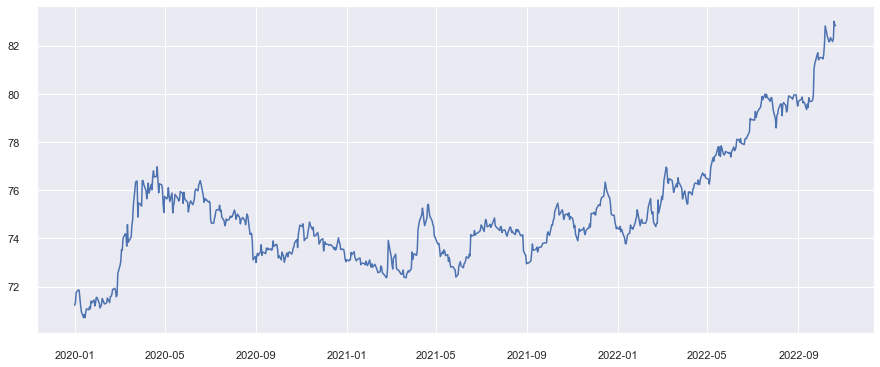

In [1179]:
import matplotlib.pyplot as plt
plt.plot(dataset)

In [1180]:
np.reshape(dataset, (-1, 1))

,rate
date,
2020-01-01,71.226997
2020-01-02,71.349998
2020-01-03,71.769997
2020-01-06,71.866997
2020-01-07,71.845001
...,...
2022-10-17,82.170998
2022-10-18,82.291000
2022-10-19,83.013000


In [1181]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [1182]:
dataset1=dataset.copy()

In [1183]:
# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

659 74


In [1184]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [1185]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [1186]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [1187]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
657/657 - 4s - loss: 0.0225 - 4s/epoch - 6ms/step
Epoch 2/100
657/657 - 1s - loss: 0.0074 - 885ms/epoch - 1ms/step
Epoch 3/100
657/657 - 1s - loss: 0.0030 - 754ms/epoch - 1ms/step
Epoch 4/100
657/657 - 1s - loss: 8.5880e-04 - 727ms/epoch - 1ms/step
Epoch 5/100
657/657 - 1s - loss: 4.7874e-04 - 774ms/epoch - 1ms/step
Epoch 6/100
657/657 - 1s - loss: 4.6285e-04 - 763ms/epoch - 1ms/step
Epoch 7/100
657/657 - 1s - loss: 4.6705e-04 - 721ms/epoch - 1ms/step
Epoch 8/100
657/657 - 1s - loss: 4.6084e-04 - 739ms/epoch - 1ms/step
Epoch 9/100
657/657 - 1s - loss: 4.7350e-04 - 1s/epoch - 2ms/step
Epoch 10/100
657/657 - 2s - loss: 4.7131e-04 - 2s/epoch - 4ms/step
Epoch 11/100
657/657 - 2s - loss: 4.7596e-04 - 2s/epoch - 4ms/step
Epoch 12/100
657/657 - 1s - loss: 4.6861e-04 - 1s/epoch - 2ms/step
Epoch 13/100
657/657 - 1s - loss: 4.6030e-04 - 730ms/epoch - 1ms/step
Epoch 14/100
657/657 - 1s - loss: 4.8106e-04 - 721ms/epoch - 1ms/step
Epoch 15/100
657/657 - 1s - loss: 4.6572e-04 - 725ms/epo

In [1188]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_absolute_percentage_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MAPE' % (trainScore))
testScore = np.sqrt(mean_absolute_percentage_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAPE' % (testScore))

3/3 [==============================] - 0s 9ms/step
Train Score: 0.49 MAPE
Test Score: 0.60 MAPE


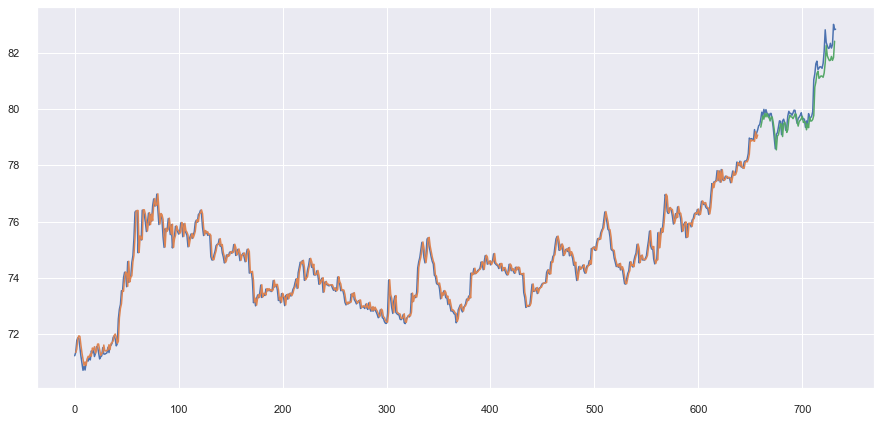

In [1189]:
plt.figure(figsize=(15,7))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [1400]:
# Taking the last 64 data points 
x_input=test[60:].reshape(1,-1)
x_input.shape

(1, 14)

In [1401]:
# Storing the values in a list.
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [1408]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=14
i=0
while(i<30):
    
    if(len(temp_input)>14):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        testPredict = model.predict(x_input, verbose=0)
      #  print("{} day output {}".format(i,yhat))
        temp_input.extend(testPredict[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(testPredict.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        testPredict = model.predict(x_input, verbose=0)
       # print(yhat[0])
        temp_input.extend(testPredict[0].tolist())
        #print(len(temp_input))
        lst_output.extend(testPredict.tolist())
        i=i+1
    

print(lst_output)
len(lst_output)

[[2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295], [2.6880176067352295]]


30

In [1388]:
day_new=np.arange(1,69)
day_pred=np.arange(69,99)

In [1369]:
day_new.shape

(68,)

In [1362]:
day_new

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68])

In [1389]:
dataset

array([[4.2022228e-02],
       [5.2019596e-02],
       [8.6157322e-02],
       [9.4041824e-02],
       [9.2254162e-02],
       [6.5024853e-02],
       [4.0640354e-02],
       [2.0319939e-02],
       [0.0000000e+00],
       [1.1379242e-02],
       [8.1300735e-04],
       [2.1782875e-02],
       [2.9993057e-02],
       [2.6822567e-02],
       [3.7389278e-02],
       [3.0074120e-02],
       [5.6084156e-02],
       [5.0394535e-02],
       [6.0147762e-02],
       [3.9827347e-02],
       [4.8768520e-02],
       [6.8276405e-02],
       [6.8682194e-02],
       [4.9906254e-02],
       [3.2918453e-02],
       [3.9014816e-02],
       [4.1859627e-02],
       [6.5431118e-02],
       [4.7142982e-02],
       [4.6736717e-02],
       [4.8443317e-02],
       [5.0394535e-02],
       [6.6568851e-02],
       [5.1206589e-02],
       [7.1120739e-02],
       [7.2340012e-02],
       [7.8842640e-02],
       [9.5098495e-02],
       [9.9568844e-02],
       [9.0221882e-02],
       [7.0714474e-02],
       [7.681036

In [1349]:
dataset.shape

(733, 1)

In [1409]:
dataaa=scaler.inverse_transform(lst_output)
dataaa


array([[103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857],
       [103.7806857]])

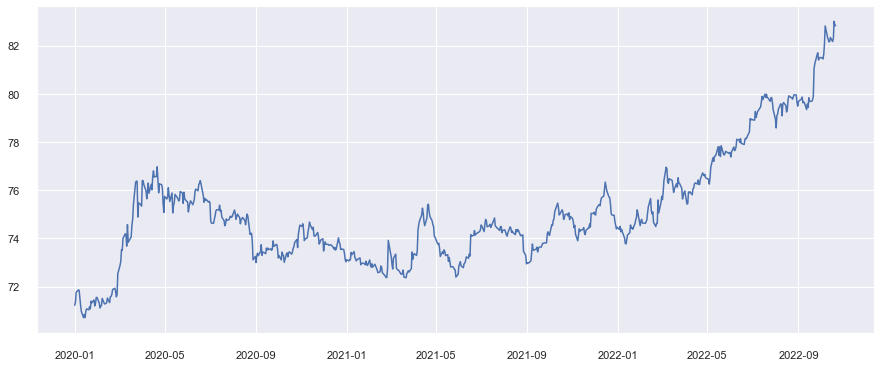

In [1412]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [1414]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [1415]:
##splitting dataset into train and test split 

training_size=int(len(df2)*0.86)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [1416]:
training_size,test_size

(630, 103)

In [1417]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [1443]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [1444]:
print(X_train.shape), print(y_train.shape)

(599, 30)
(599,)


(None, None)

In [1445]:
print(X_test.shape)
print(ytest.shape)

(72, 30)
(72,)


In [1446]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [1447]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [1448]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [1449]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 30, 50)            10400     
                                                                 
 lstm_18 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_19 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [1450]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
10/10 [==============================] - 8s 210ms/step - loss: 0.0282 - val_loss: 0.0590
Epoch 2/30
10/10 [==============================] - 0s 47ms/step - loss: 0.0073 - val_loss: 0.0461
Epoch 3/30
10/10 [==============================] - 0s 49ms/step - loss: 0.0046 - val_loss: 0.0582
Epoch 4/30
10/10 [==============================] - 0s 46ms/step - loss: 0.0041 - val_loss: 0.0359
Epoch 5/30
10/10 [==============================] - 0s 49ms/step - loss: 0.0036 - val_loss: 0.0410
Epoch 6/30
10/10 [==============================] - 0s 47ms/step - loss: 0.0034 - val_loss: 0.0169
Epoch 7/30
10/10 [==============================] - 1s 58ms/step - loss: 0.0033 - val_loss: 0.0220
Epoch 8/30
10/10 [==============================] - 0s 46ms/step - loss: 0.0029 - val_loss: 0.0129
Epoch 9/30
10/10 [==============================] - 1s 50ms/step - loss: 0.0028 - val_loss: 0.0065
Epoch 10/30
10/10 [==============================] - 1s 50ms/step - loss: 0.0026 - val_loss: 0.0094
Epoch 11

In [1451]:
import tensorflow as tf

In [1452]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 16ms/step


In [1453]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [1455]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

74.11385928512475

In [1456]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

79.9591663508419

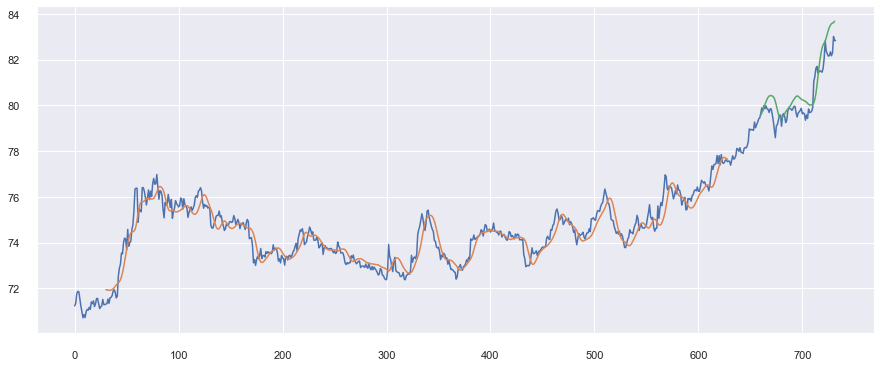

In [1458]:
### Plotting 
# shift train predictions for plotting
look_back=30
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [1484]:
# Taking the last 100 data points 
x_input=test_data[44:].reshape(1,-1)
x_input.shape

(1, 59)

In [1475]:
# Storing the values in a list. 
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [1476]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=59
i=0
while(i<30):
    
    if(len(temp_input)>43):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
      #  print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
       # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
len(lst_output)

[[1.0771962404251099], [1.0942102670669556], [1.1188589334487915], [1.150025486946106], [1.1865227222442627], [1.2274316549301147], [1.2721673250198364], [1.3204116821289062], [1.3720084428787231], [1.4268662929534912], [1.4848812818527222], [1.545881986618042], [1.609593391418457], [1.6756200790405273], [1.7434425354003906], [1.8124245405197144], [1.8818340301513672], [1.9508802890777588], [2.0187573432922363], [2.084690570831299], [2.147986888885498], [2.20806884765625], [2.2644999027252197], [2.3169939517974854], [2.3654122352600098], [2.409743309020996], [2.4500815868377686], [2.486602544784546], [2.5195345878601074], [2.549137830734253]]


30

In [1477]:
day_new=np.arange(1,30)
day_pred=np.arange(31,35)